# Machine Learning Final Project

Michael Li

Dec 10, 2017

## Environment Setup

In [151]:
# import relevant libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import timeit
import datetime
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

In [2]:
# suppress warnings
import warnings
warnings.simplefilter('ignore')

## Load and Cleanse Dataset 

In [3]:
# load dataset 
mnisttt = input_data.read_data_sets(".", one_hot=False, validation_size = 0)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [4]:
# define function to plot images
def image_plot(image, size):
    idxs = np.random.randint(len(image), size=size)
    plt.clf()
    f, axarr = plt.subplots(1, size, figsize = (20,20))
    for i in range(0,len(idxs)):
        X = mnisttt.train.images[idxs[i]]
        X = X.reshape([28, 28])
        axarr[i].imshow(X)
        axarr[i].set_axis_off()
    plt.show()

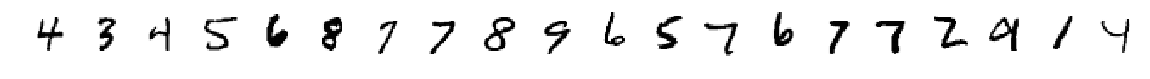

In [5]:
# plot 20 random images
image_plot(mnisttt.train.images, 20)

In [6]:
# print dataset size
print('The size of training image dataset is: ', mnisttt.train.images.shape)
print('The size of training label dataset is: ', mnisttt.train.labels.shape)
print('The size of validation image dataset is: ', mnisttt.validation.images.shape)
print('The size of validation label dataset is: ', mnisttt.validation.labels.shape)
print('The size of testing image dataset is: ', mnisttt.test.images.shape)
print('The size of testing label dataset is: ', mnisttt.test.labels.shape)

The size of training image dataset is:  (60000, 784)
The size of training label dataset is:  (60000,)
The size of validation image dataset is:  (0, 784)
The size of validation label dataset is:  (0,)
The size of testing image dataset is:  (10000, 784)
The size of testing label dataset is:  (10000,)


## Compute Easy / Hard Label

- To find the label 'Easy / Hard', 5 classification models will be used:
    1. Perceptron
    2. Logistic Regression
    3. Linear SVM
    4. Decision Tree
    5. Random Forest


- Each classification model will be applied with 2 sets of parameters, which totals up to 10 classification results

### Classification using Perceptron

In [35]:
# define a function to classify data using Perceptron
def clf_perceptron(train_image, train_label, test_image, test_label, p):
    clf = Perceptron(n_iter=p)
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Perceptron'] = df_train_temp.apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Perceptron'] = df_test_temp.apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Perceptron']], df_test_temp[['Perceptron']]

In [65]:
start = timeit.default_timer()
# Use perceptron to classify training and testing datasets with n_iter = 75
df_p_train1, df_p_test1 = clf_perceptron(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 75)

# Use perceptron to classify training and testing datasets with n_iter = 150
df_p_train2, df_p_test2 = clf_perceptron(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 150)

# rename the dataframes to include parameter
df_p_train1.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 75'}, inplace = True)
df_p_test1.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 75'}, inplace = True)
df_p_train2.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 150'}, inplace = True)
df_p_test2.rename(columns = {'Perceptron': 'C1 Perceptron n_iter = 150'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 173.288


### Classification using Logistic Regression

In [40]:
# define a function to classify data using Logistic Regression
def clf_logit(train_image, train_label, test_image, test_label, p):
    clf = LogisticRegression(penalty = 'l2', C = p, solver ='newton-cg')
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Logit'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Logit'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Logit']], df_test_temp[['Logit']]

In [66]:
start = timeit.default_timer()
# Use Logistic Regression to classify training and testing datasets with C = 0.1
df_logit_train1, df_logit_test1 = clf_logit(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.1)

# Use Logistic Regression to classify training and testing datasets with C = 0.01
df_logit_train2, df_logit_test2 = clf_logit(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.01)

# rename the dataframes to include parameter
df_logit_train1.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.1'}, inplace = True)
df_logit_test1.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.1'}, inplace = True)
df_logit_train2.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.01'}, inplace = True)
df_logit_test2.rename(columns = {'Logit': 'C2 Logistic Regression C = 0.01'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 355.211


### Classification using Linear SVM

In [42]:
# define a function to classify data using Linear SVM
def clf_lsvm(train_image, train_label, test_image, test_label, p):
    clf = LinearSVC(penalty = 'l2', C = p, multi_class = 'ovr')
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Linear SVM'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Linear SVM'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Linear SVM']], df_test_temp[['Linear SVM']]

In [67]:
start = timeit.default_timer()
# Use Linear SVM to classify training and testing datasets with C = 0.1
df_lsvm_train1, df_lsvm_test1 = clf_lsvm(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.1)

# Use Linear SVM to classify training and testing datasets with C = 0.01
df_lsvm_train2, df_lsvm_test2 = clf_lsvm(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 0.01)

# rename the dataframes to include parameter
df_lsvm_train1.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.1'}, inplace = True)
df_lsvm_test1.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.1'}, inplace = True)
df_lsvm_train2.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.01'}, inplace = True)
df_lsvm_test2.rename(columns = {'Linear SVM': 'C3 Linear SVM C = 0.01'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 45.904


### Classification using Decision Tree

In [50]:
# Before applying decision tree model to predict, 
# since the Decision Tree model's optimal parameter has not been searched, 
# I will use GridSearchCV to find the best parameter
start = timeit.default_timer()

# set the parameter grid for max_depth
param_grid = {'max_depth': np.arange(3,26)}
clf_tree = GridSearchCV(DecisionTreeClassifier(),param_grid)
clf_tree.fit(mnisttt.train.images, mnisttt.train.labels)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 594.915


The best parameter for max_depth is 16 or 17.

In [54]:
# define a function to classify data using Decision Tree
def clf_dtree(train_image, train_label, test_image, test_label, p):
    clf = DecisionTreeClassifier(max_depth = p)
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Decision tree'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Decision tree'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Decision tree']], df_test_temp[['Decision tree']]

In [74]:
start = timeit.default_timer()
# Use Decision Tree to classify training and testing datasets with max_depth = 16
df_dtree_train1, df_dtree_test1 = clf_dtree(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 16)

# Use Decision Tree to classify training and testing datasets with max_depth = 10
df_dtree_train2, df_dtree_test2 = clf_dtree(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 10)

# rename the dataframes to include parameter
df_dtree_train1.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 16'}, inplace = True)
df_dtree_test1.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 16'}, inplace = True)
df_dtree_train2.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 10'}, inplace = True)
df_dtree_test2.rename(columns = {'Decision tree': 'C4 Decision Tree max_depth = 10'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 32.062


### Classification using Random Forest

In [57]:
# Before applying random forest model to predict, 
# since the Random Forest model's optimal parameter has not been searched, 
# I will use GridSearchCV to find the best parameter
start = timeit.default_timer()

# set the parameter grid for max_depth
param_grid = {'n_estimators': np.arange(10,51,10),'max_depth': np.arange(3,10)}
clf_rdmforest = GridSearchCV(RandomForestClassifier(),param_grid)
clf_rdmforest.fit(mnisttt.train.images, mnisttt.train.labels)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 487.623


The best parameter set is: 

- max_depth = 9
- n_estimators = 50

The accuracy is presumed to continue increase with deeper depth and more estimators.

The change in max_depth has larger effect on accuracy then change in n_estimators.

In [61]:
# define a function to classify data using Random Forest
def clf_rdmfst(train_image, train_label, test_image, test_label, p):
    clf = RandomForestClassifier(n_estimators = 50, max_depth = p)
    clf.fit(train_image, train_label)
    train_pred = clf.predict(train_image)
    test_pred = clf.predict(test_image)
    df_train_temp = pd.DataFrame({'Label': train_label, 'Pred': train_pred})
    df_test_temp = pd.DataFrame({'Label': test_label, 'Pred': test_pred})
    # Correct -> 1, Wrong -> 0
    df_train_temp['Random forest'] = df_train_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    df_test_temp['Random forest'] = df_test_temp[['Label','Pred']].apply(lambda x: 1 if x['Label'] == x['Pred'] else 0, axis = 1)
    return df_train_temp[['Random forest']], df_test_temp[['Random forest']]

In [75]:
start = timeit.default_timer()
# Use Random Forest to classify training and testing datasets with max_depth = 9
df_rdmfst_train1, df_rdmfst_test1 = clf_rdmfst(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 9)

# Use Random Forest to classify training and testing datasets with max_depth = 7
df_rdmfst_train2, df_rdmfst_test2 = clf_rdmfst(mnisttt.train.images, mnisttt.train.labels, 
                                         mnisttt.test.images, mnisttt.test.labels, 7)
# rename the dataframes to include parameter
df_rdmfst_train1.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 9'}, inplace = True)
df_rdmfst_test1.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 9'}, inplace = True)
df_rdmfst_train2.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 7'}, inplace = True)
df_rdmfst_test2.rename(columns = {'Random forest': 'C5 Random Forest max_depth = 7'}, inplace = True)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 31.375


### Consolidate result

In [76]:
# Merge all result together into a dataframe
df_train_cw = pd.concat([df_p_train1, df_p_train2, df_logit_train1, df_logit_train2, 
                               df_lsvm_train1, df_lsvm_train2, df_dtree_train1, df_dtree_train2,
                               df_rdmfst_train1, df_rdmfst_train2], axis = 1)

df_test_cw = pd.concat([df_p_test1, df_p_test2, df_logit_test1, df_logit_test2, 
                               df_lsvm_test1, df_lsvm_test2, df_dtree_test1, df_dtree_test2,
                               df_rdmfst_test1, df_rdmfst_test2], axis = 1)

In [78]:
# preview the first 5 rows of training dataset result
df_train_cw.head()

,C1 Perceptron n_iter = 75,C1 Perceptron n_iter = 150,C2 Logistic Regression C = 0.1,C2 Logistic Regression C = 0.01,C3 Linear SVM C = 0.1,C3 Linear SVM C = 0.01,C4 Decision Tree max_depth = 16,C4 Decision Tree max_depth = 10,C5 Random Forest max_depth = 9,C5 Random Forest max_depth = 7
0,0,0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1


In [116]:
# save result to csv file
df_train_cw.to_csv('train_correct_wrong.csv', index = True)
df_test_cw.to_csv('test_correct_wrong.csv', index = True)

### Set threshold and compute Easy / Hard label

In [7]:
# read correct_wrong file
df_train_cw = pd.read_csv('train_correct_wrong.csv', index_col = 0)
df_test_cw = pd.read_csv('test_correct_wrong.csv', index_col = 0)

In [8]:
# check correct_wrong dataframe
df_train_cw.head()

,C1 Perceptron n_iter = 75,C1 Perceptron n_iter = 150,C2 Logistic Regression C = 0.1,C2 Logistic Regression C = 0.01,C3 Linear SVM C = 0.1,C3 Linear SVM C = 0.01,C4 Decision Tree max_depth = 16,C4 Decision Tree max_depth = 10,C5 Random Forest max_depth = 9,C5 Random Forest max_depth = 7
0,0,0,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1


In [9]:
# set default threshold to be 50%
# Easy -> 0, Hard -> 1
df_train_cw_50 = df_train_cw.apply(lambda x: 0 if np.average(x) >= 0.5 else 1, axis = 1)
df_test_cw_50 = df_test_cw.apply(lambda x: 0 if np.average(x) >= 0.5 else 1, axis = 1)

In [10]:
# count the number of easy and hard images
print(df_train_cw_50.value_counts())
print(df_test_cw_50.value_counts())

0    56171
1     3829
dtype: int64
0    9272
1     728
dtype: int64


In [11]:
# get the array of easy/hard label
eh_train_label_50 = df_train_cw_50.values
eh_test_label_50 = df_test_cw_50.values

## Classify Easy / Hard Label

Since any classification model can be used to classify the easy / hard label, logistic regression, linear svm and random forest models are chosen for this step.

To achieve better accuracy, gridsearchCV is used in this step.

### Classification with Logistic Regression

In [12]:
start = timeit.default_timer()

# set the parameter grid for C
param_grid_logit = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 5]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring parameter
clf_eh_grid_logit = GridSearchCV(LogisticRegression(penalty= 'l2', solver='newton-cg'),param_grid_logit, scoring = 'accuracy', cv = 3)
clf_eh_grid_logit.fit(mnisttt.train.images, eh_train_label_50)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 396.666


In [13]:
clf_eh_grid_logit.grid_scores_

[mean: 0.93618, std: 0.00002, params: {'C': 0.0001},
 mean: 0.93618, std: 0.00002, params: {'C': 0.001},
 mean: 0.93615, std: 0.00007, params: {'C': 0.01},
 mean: 0.93612, std: 0.00019, params: {'C': 0.1},
 mean: 0.93572, std: 0.00065, params: {'C': 1},
 mean: 0.93517, std: 0.00073, params: {'C': 5}]

The optimal tuned Logistic Regression model:

- parameter: C = 0.001

- average accuracy = 93.618%

In [14]:
# predict test labels and get accuracy
clf_eh_grid_logit.score(mnisttt.test.images, eh_test_label_50)

0.92720000000000002

The test accuracy is 92.72%

### Classification with Linear SVM

In [18]:
start = timeit.default_timer()

# set the parameter grid for C
param_grid_lsvm = {'C': [0.0001,0.01, 1, 5, 10]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_lsvm = GridSearchCV(LinearSVC(penalty = 'l2', multi_class = 'ovr'),param_grid_lsvm, scoring = 'accuracy', cv = 3)
clf_eh_grid_lsvm.fit(mnisttt.train.images, eh_train_label_50)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 254.497


In [19]:
clf_eh_grid_lsvm.grid_scores_

[mean: 0.93618, std: 0.00002, params: {'C': 0.0001},
 mean: 0.93618, std: 0.00002, params: {'C': 0.01},
 mean: 0.93597, std: 0.00009, params: {'C': 1},
 mean: 0.93588, std: 0.00016, params: {'C': 5},
 mean: 0.93507, std: 0.00115, params: {'C': 10}]

The optimal tuned Logistic Regression model:

- parameter: C = 0.01

- average accuracy = 93.618%

In [20]:
# predict test labels and get accuracy
clf_eh_grid_lsvm.score(mnisttt.test.images, eh_test_label_50)

0.92720000000000002

The test accuracy is 92.72%

### Classification with Random Forest

In [30]:
start = timeit.default_timer()

# set the parameter grid for C
param_grid_rf = {'n_estimators': [50],'max_depth': [5, 10, 15, 20, 50, 100]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, scoring = 'accuracy', cv = 3)
clf_eh_grid_rf.fit(mnisttt.train.images, eh_train_label_50)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 260.811


In [31]:
clf_eh_grid_rf.grid_scores_

[mean: 0.93618, std: 0.00002, params: {'max_depth': 5, 'n_estimators': 50},
 mean: 0.93618, std: 0.00002, params: {'max_depth': 10, 'n_estimators': 50},
 mean: 0.93622, std: 0.00006, params: {'max_depth': 15, 'n_estimators': 50},
 mean: 0.93643, std: 0.00013, params: {'max_depth': 20, 'n_estimators': 50},
 mean: 0.93642, std: 0.00002, params: {'max_depth': 50, 'n_estimators': 50},
 mean: 0.93640, std: 0.00014, params: {'max_depth': 100, 'n_estimators': 50}]

In [113]:
start = timeit.default_timer()

# set the parameter grid for C
param_grid_rf = {'n_estimators': [100],'max_depth': [5, 10, 15, 20, 50]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, scoring = 'accuracy', cv = 3)
clf_eh_grid_rf.fit(mnisttt.train.images, eh_train_label_50)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 367.467


In [26]:
clf_eh_grid_rf.grid_scores_

[mean: 0.93618, std: 0.00002, params: {'max_depth': 5, 'n_estimators': 100},
 mean: 0.93618, std: 0.00002, params: {'max_depth': 10, 'n_estimators': 100},
 mean: 0.93625, std: 0.00004, params: {'max_depth': 15, 'n_estimators': 100},
 mean: 0.93635, std: 0.00012, params: {'max_depth': 20, 'n_estimators': 100},
 mean: 0.93637, std: 0.00010, params: {'max_depth': 50, 'n_estimators': 100}]

The optimal tuned Random Forest model:

- parameter: max_depth = 20, n_estimators = 50

- average accuracy = 93.643%

In [32]:
# predict test labels and get accuracy
clf_eh_grid_rf.score(mnisttt.test.images, eh_test_label_50)

0.92759999999999998

The test accuracy is 92.76%

### Conclusion

Overall, the difference between 3 simple models are small:

- Logistic Regression:
    - Parameter: C = 0.001
    - Test Accuracy: 92.72%

- Linear SVM:
    - Parameter: C = 0.01
    - Test Accuracy: 92.72%

- Random Forest:
    - Parameter: max_depth = 20, n_estimators = 50
    - Test Accuracy: 92.76

The ***Random Forest*** model's performance is slightly better than the other two.

In [122]:
# train the random forest model for future use
clf_eh_rf = GridSearchCV(RandomForestClassifier(n_estimators=50), param_grid = {'max_depth': [20]}, scoring='accuracy', cv = 3)
clf_eh_rf.fit(mnisttt.train.images, eh_train_label_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'max_depth': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [123]:
clf_eh_rf.grid_scores_

[mean: 0.93645, std: 0.00004, params: {'max_depth': 20}]

## Classify Easy Images

### Split Easy dataset

In [125]:
# split training easy image data
train_image_easy = pd.DataFrame(mnisttt.train.images)
train_image_easy['eh'] = eh_train_label_50
train_image_easy = train_image_easy[train_image_easy['eh'] == 0]
train_image_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy image data
test_image_easy = pd.DataFrame(mnisttt.test.images)
test_image_easy['eh'] = eh_test_label_50
test_image_easy = test_image_easy[test_image_easy['eh'] == 0]
test_image_easy.drop(['eh'], axis = 1, inplace = True)

In [126]:
# check training and testing easy image dataset shape
print(train_image_easy.shape)
print(test_image_easy.shape)

(56171, 784)
(9272, 784)


In [127]:
# split training easy label data
train_label_easy = pd.DataFrame(mnisttt.train.labels)
train_label_easy['eh'] = eh_train_label_50
train_label_easy = train_label_easy[train_label_easy['eh'] == 0]
train_label_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy label data
test_label_easy = pd.DataFrame(mnisttt.test.labels)
test_label_easy['eh'] = eh_test_label_50
test_label_easy = test_label_easy[test_label_easy['eh'] == 0]
test_label_easy.drop(['eh'], axis = 1, inplace = True)

In [128]:
# check training and testing easy label dataset shape
print(train_label_easy.shape)
print(test_label_easy.shape)

(56171, 1)
(9272, 1)


### Simple Classifier for Easy Image

For the simple classifier, the model with best accuracy is Radial SVM (C = 50)

In [129]:
start = timeit.default_timer()

# fit easy data to radial svm model
clf_easy = SVC(C = 50, kernel = 'rbf', degree = 3, gamma = 'auto')
clf_easy.fit(train_image_easy, train_label_easy)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 111.815


In [33]:
# get the accuracy of the easy model on training dataset
clf_easy.score(train_image_easy, train_label_easy)

0.99919887486425385

In [56]:
# get the accuracy of the easy model on test dataset
clf_easy.score(test_image_easy, test_label_easy)

0.99525452976704054

In [132]:
clf_easy.predict(test_image_easy.iloc[0])

array([7], dtype=uint8)

## Classify Hard Images

### Split Hard Dataset

In [53]:
# load OneHotEncode dataset
mnisttt_one_hot = input_data.read_data_sets(".", one_hot=True, validation_size = 0)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [54]:
# split training hard image data
train_image_hard = pd.DataFrame(mnisttt.train.images)
train_image_hard['eh'] = eh_train_label_50
train_image_hard = train_image_hard[train_image_hard['eh'] == 1]
train_image_hard.drop(['eh'], axis = 1, inplace = True)
train_image_hard.reset_index(drop = True, inplace = True)
train_image_hard = train_image_hard.as_matrix()

# split testing hard image data
test_image_hard = pd.DataFrame(mnisttt.test.images)
test_image_hard['eh'] = eh_test_label_50
test_image_hard = test_image_hard[test_image_hard['eh'] == 1]
test_image_hard.drop(['eh'], axis = 1, inplace = True)
test_image_hard.reset_index(drop = True, inplace = True)
test_image_hard = test_image_hard.as_matrix()

In [55]:
# check training and testing hard image dataset shape
print(train_image_hard.shape)
print(test_image_hard.shape)

(3829, 784)
(728, 784)


In [60]:
# split training hard label data
train_label_hard = pd.DataFrame(mnisttt.train.labels)
train_label_hard['eh'] = eh_train_label_50
train_label_hard = train_label_hard[train_label_hard['eh'] == 1]
train_label_hard.drop(['eh'], axis = 1, inplace = True)
train_label_hard.reset_index(drop = True, inplace = True)
train_label_hard = train_label_hard.as_matrix()

# split testing hard label data
test_label_hard = pd.DataFrame(mnisttt.test.labels)
test_label_hard['eh'] = eh_test_label_50
test_label_hard = test_label_hard[test_label_hard['eh'] == 1]
test_label_hard.drop(['eh'], axis = 1, inplace = True)
test_label_hard.reset_index(drop = True, inplace = True)
test_label_hard = test_label_hard.as_matrix()

In [61]:
# check training and testing hard label dataset shape
print(train_label_hard.shape)
print(test_label_hard.shape)

(3829, 1)
(728, 1)


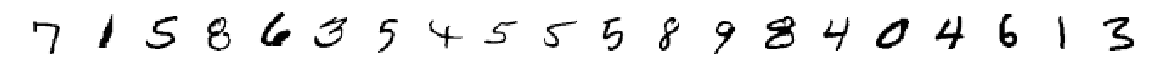

In [58]:
# plot 20 random hard images
image_plot(train_image_hard, 20)

### MLP Classifier for Hard Images

In [49]:
# use sklearn to construct MLP classifier
start = timeit.default_timer()

# set the parameter grid for C
param_grid_mlp = {'hidden_layer_sizes': [(64, 32), (64,64), (128,64), (128, 64, 32), (256, 128, 64, 32)],
                  'max_iter': [100, 200],
                  'learning_rate_init': [0.001, 0.01, 0.1]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_mlp = GridSearchCV(MLPClassifier(activation='relu',alpha=1e-4,
                                            solver='sgd', verbose=10, tol=1e-4, random_state=1),
                              param_grid_mlp, scoring = 'accuracy', cv = 3)
clf_eh_grid_mlp.fit(mnisttt.train.images, eh_train_label_50)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Iteration 1, loss = 0.31223753
Iteration 2, loss = 0.24773982
Iteration 3, loss = 0.24500688
Iteration 4, loss = 0.24280470
Iteration 5, loss = 0.24085004
Iteration 6, loss = 0.23912748
Iteration 7, loss = 0.23755261
Iteration 8, loss = 0.23608282
Iteration 9, loss = 0.23470147
Iteration 10, loss = 0.23336781
Iteration 11, loss = 0.23207677
Iteration 12, loss = 0.23086923
Iteration 13, loss = 0.22966938
Iteration 14, loss = 0.22849886
Iteration 15, loss = 0.22736993
Iteration 16, loss = 0.22624543
Iteration 17, loss = 0.22520487
Iteration 18, loss = 0.22414179
Iteration 19, loss = 0.22313614
Iteration 20, loss = 0.22211921
Iteration 21, loss = 0.22108807
Iteration 22, loss = 0.22008068
Iteration 23, loss = 0.21912861
Iteration 24, loss = 0.21818127
Iteration 25, loss = 0.21718968
Iteration 26, loss = 0.21625161
Iteration 27, loss = 0.21533969
Iteration 28, loss = 0.21434855
Iteration 29, loss = 0.21351361
Iteration 30, loss = 0.21257390
Iteration 31, loss = 0.21173229
Iteration 32, los

In [50]:
clf_eh_grid_mlp.grid_scores_

[mean: 0.93657, std: 0.00008, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 100},
 mean: 0.93403, std: 0.00123, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 200},
 mean: 0.91415, std: 0.01411, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'max_iter': 100},
 mean: 0.91415, std: 0.01411, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mean: 0.93170, std: 0.00179, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.1, 'max_iter': 100},
 mean: 0.93170, std: 0.00179, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.1, 'max_iter': 200},
 mean: 0.93625, std: 0.00067, params: {'hidden_layer_sizes': (64, 64), 'learning_rate_init': 0.001, 'max_iter': 100},
 mean: 0.93393, std: 0.00133, params: {'hidden_layer_sizes': (64, 64), 'learning_rate_init': 0.001, 'max_iter': 200},
 mean: 0.93092, std: 0.00479, params: {'hidden_layer_sizes': (

In [58]:
clf_eh_grid_mlp.score(test_image_hard, test_label_hard)

0.024725274725274724

In [63]:
# use sklearn to construct MLP classifier
start = timeit.default_timer()

# set the parameter grid for C
param_grid_mlp_hard = {'hidden_layer_sizes': [(512, 256, 64, 32, 16, 4), (256, 128, 64, 32)],
                      'max_iter': [200],
                      'learning_rate_init': [0.1],
                      'alpha': [0.1],
                      'solver': ['sgd'],
                      'tol': [0.001]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_mlp_hard = GridSearchCV(MLPClassifier(activation='relu', verbose=10, random_state=3),
                              param_grid_mlp_hard, scoring = 'accuracy', cv = 3)
clf_eh_grid_mlp_hard.fit(train_image_hard, train_label_hard.flatten())

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Iteration 1, loss = 2.58591462
Iteration 2, loss = 2.44559304
Iteration 3, loss = 2.35552763
Iteration 4, loss = 2.20586270
Iteration 5, loss = 2.20744242
Iteration 6, loss = 2.01352731
Iteration 7, loss = 1.94378427
Iteration 8, loss = 1.85239201
Iteration 9, loss = 1.69188133
Iteration 10, loss = 1.58125705
Iteration 11, loss = 1.58881835
Iteration 12, loss = 1.32754951
Iteration 13, loss = 1.48457136
Iteration 14, loss = 1.59954259
Iteration 15, loss = 1.20857141
Iteration 16, loss = 1.05415735
Iteration 17, loss = 1.17850403
Iteration 18, loss = 0.93477245
Iteration 19, loss = 1.01917140
Iteration 20, loss = 0.88782647
Iteration 21, loss = 0.74907190
Iteration 22, loss = 0.63374150
Iteration 23, loss = 1.27054485
Iteration 24, loss = 1.62899691
Iteration 25, loss = 1.04377707
Training loss did not improve more than tol=0.001000 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.58315456
Iteration 2, loss = 2.42425428
Iteration 3, loss = 2.31610198
Iteration 4, loss = 2.355

In [72]:
clf_eh_grid_mlp_hard.grid_scores_

[mean: 0.41525, std: 0.00102, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 100},
 mean: 0.52651, std: 0.00088, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 200},
 mean: 0.64090, std: 0.01337, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'max_iter': 100},
 mean: 0.64194, std: 0.01128, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mean: 0.68425, std: 0.00485, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.1, 'max_iter': 100},
 mean: 0.68425, std: 0.00485, params: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.1, 'max_iter': 200},
 mean: 0.43641, std: 0.00544, params: {'hidden_layer_sizes': (64, 64), 'learning_rate_init': 0.001, 'max_iter': 100},
 mean: 0.54688, std: 0.00503, params: {'hidden_layer_sizes': (64, 64), 'learning_rate_init': 0.001, 'max_iter': 200},
 mean: 0.66466, std: 0.00270, params: {'hidden_layer_sizes': (

In [19]:
clf_eh_grid_mlp_hard.grid_scores_

[mean: 0.66937, std: 0.00202, params: {'hidden_layer_sizes': (512, 256, 128, 64, 32), 'learning_rate_init': 0.001, 'max_iter': 200},
 mean: 0.68112, std: 0.04846, params: {'hidden_layer_sizes': (512, 256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mean: 0.59963, std: 0.16670, params: {'hidden_layer_sizes': (512, 256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200},
 mean: 0.17942, std: 0.00018, params: {'hidden_layer_sizes': (512, 256, 128, 64, 32), 'learning_rate_init': 1, 'max_iter': 200},
 mean: 0.67746, std: 0.00427, params: {'hidden_layer_sizes': (1024, 512, 256, 128, 64, 32), 'learning_rate_init': 0.001, 'max_iter': 200},
 mean: 0.52781, std: 0.15335, params: {'hidden_layer_sizes': (1024, 512, 256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mean: 0.68425, std: 0.08097, params: {'hidden_layer_sizes': (1024, 512, 256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200},
 mean: 0.17132, std: 0.01133, params: {'hidden_layer_sizes': 

In [37]:
clf_eh_grid_mlp_hard.grid_scores_

[mean: 0.71559, std: 0.00375, params: {'alpha': 0.0001, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mean: 0.74197, std: 0.02216, params: {'alpha': 0.0001, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200},
 mean: 0.71350, std: 0.00167, params: {'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mean: 0.72839, std: 0.01380, params: {'alpha': 0.001, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200},
 mean: 0.71167, std: 0.00484, params: {'alpha': 0.01, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mean: 0.73831, std: 0.01139, params: {'alpha': 0.01, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200},
 mean: 0.71272, std: 0.00274, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200},
 mea

In [42]:
clf_eh_grid_mlp_hard.grid_scores_

[mean: 0.70593, std: 0.00108, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'lbfgs'},
 mean: 0.71272, std: 0.00274, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd'},
 mean: 0.69783, std: 0.02264, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'adam'},
 mean: 0.70593, std: 0.00108, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'lbfgs'},
 mean: 0.75712, std: 0.01847, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'sgd'},
 mean: 0.16323, std: 0.01129, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'adam'}]

In [44]:
clf_eh_grid_mlp_hard.grid_scores_

[mean: 0.71272, std: 0.00274, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd', 'tol': 1e-05},
 mean: 0.71272, std: 0.00274, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.0001},
 mean: 0.71089, std: 0.00291, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.001},
 mean: 0.70253, std: 0.00569, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.01},
 mean: 0.75712, std: 0.01847, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'sgd', 'tol': 1e-05},
 mean: 0.75712, std: 0.01847, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 's

In [47]:
clf_eh_grid_mlp_hard.grid_scores_

[mean: 0.71272, std: 0.00274, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.0001},
 mean: 0.71089, std: 0.00291, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.001},
 mean: 0.71690, std: 0.00352, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 400, 'solver': 'sgd', 'tol': 0.0001},
 mean: 0.71089, std: 0.00291, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.01, 'max_iter': 400, 'solver': 'sgd', 'tol': 0.001},
 mean: 0.75712, std: 0.01847, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.0001},
 mean: 0.76077, std: 0.02127, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200,

In [64]:
clf_eh_grid_mlp_hard.grid_scores_

[mean: 0.44346, std: 0.16098, params: {'alpha': 0.1, 'hidden_layer_sizes': (512, 256, 64, 32, 16, 4), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.001},
 mean: 0.76077, std: 0.02127, params: {'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'sgd', 'tol': 0.001}]

In [71]:
# parameter: 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'alpha':0.0001, tol: 0.0001
clf_eh_grid_mlp_hard.score(test_image_hard, test_label_hard.flatten())

0.7678571428571429

In [38]:
# parameter: 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'alpha': 0.1, tol: 0.0001
clf_eh_grid_mlp_hard.score(test_image_hard, test_label_hard.flatten())

0.79120879120879117

In [65]:
# parameter: 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate_init': 0.1, 'max_iter': 200, 'alpha': 0.1, tol: 0.001
clf_eh_grid_mlp_hard.score(test_image_hard, test_label_hard.flatten())

0.79120879120879117

The MLP model trained with random images performed poorly on hard images, with an embarrassing **2.472%** accuracy. 

The MLP models trained only with hard images performed much better. The best one has 4 hidden layers [256, 128, 64, 32], and yielded **79.121%** accuracy.

### CNN Classifier for Hard Images

In [45]:
# use one hot encoded dataset to split easy image and labels
# split training easy image data
train_image_easy_oneHot = pd.DataFrame(mnisttt.train.images)
train_image_easy_oneHot['eh'] = eh_train_label_50
train_image_easy_oneHot = train_image_easy_oneHot[train_image_easy_oneHot['eh'] == 0]
train_image_easy_oneHot.drop(['eh'], axis = 1, inplace = True)
train_image_easy_oneHot.reset_index(drop = True, inplace = True)
train_image_easy_oneHot = train_image_easy_oneHot.as_matrix()

# split testing easy image data
test_image_easy_oneHot = pd.DataFrame(mnisttt.test.images)
test_image_easy_oneHot['eh'] = eh_test_label_50
test_image_easy_oneHot = test_image_easy_oneHot[test_image_easy_oneHot['eh'] == 0]
test_image_easy_oneHot.drop(['eh'], axis = 1, inplace = True)
test_image_easy_oneHot.reset_index(drop = True, inplace = True)
test_image_easy_oneHot = test_image_easy_oneHot.as_matrix()

# split training easy label data
train_label_easy_oneHot = pd.DataFrame(mnisttt_one_hot.train.labels)
train_label_easy_oneHot['eh'] = eh_train_label_50
train_label_easy_oneHot = train_label_easy_oneHot[train_label_easy_oneHot['eh'] == 0]
train_label_easy_oneHot.drop(['eh'], axis = 1, inplace = True)
train_label_easy_oneHot.reset_index(drop = True, inplace = True)
train_label_easy_oneHot = train_label_easy_oneHot.as_matrix()

# split testing easy label data
test_label_easy_oneHot = pd.DataFrame(mnisttt_one_hot.test.labels)
test_label_easy_oneHot['eh'] = eh_test_label_50
test_label_easy_oneHot = test_label_easy_oneHot[test_label_easy_oneHot['eh'] == 0]
test_label_easy_oneHot.drop(['eh'], axis = 1, inplace = True)
test_label_easy_oneHot.reset_index(drop = True, inplace = True)
test_label_easy_oneHot = test_label_easy_oneHot.as_matrix()

In [36]:
# use one hot encoded dataset to split hard image and labels
# split training hard image data
train_image_hard_oneHot = pd.DataFrame(mnisttt.train.images)
train_image_hard_oneHot['eh'] = eh_train_label_50
train_image_hard_oneHot = train_image_hard_oneHot[train_image_hard_oneHot['eh'] == 1]
train_image_hard_oneHot.drop(['eh'], axis = 1, inplace = True)
train_image_hard_oneHot.reset_index(drop = True, inplace = True)
train_image_hard_oneHot = train_image_hard_oneHot.as_matrix()

# split testing hard image data
test_image_hard_oneHot = pd.DataFrame(mnisttt.test.images)
test_image_hard_oneHot['eh'] = eh_test_label_50
test_image_hard_oneHot = test_image_hard_oneHot[test_image_hard_oneHot['eh'] == 1]
test_image_hard_oneHot.drop(['eh'], axis = 1, inplace = True)
test_image_hard_oneHot.reset_index(drop = True, inplace = True)
test_image_hard_oneHot = test_image_hard_oneHot.as_matrix()

# split training hard label data
train_label_hard_oneHot = pd.DataFrame(mnisttt_one_hot.train.labels)
train_label_hard_oneHot['eh'] = eh_train_label_50
train_label_hard_oneHot = train_label_hard_oneHot[train_label_hard_oneHot['eh'] == 1]
train_label_hard_oneHot.drop(['eh'], axis = 1, inplace = True)
train_label_hard_oneHot.reset_index(drop = True, inplace = True)
train_label_hard_oneHot = train_label_hard_oneHot.as_matrix()

# split testing hard label data
test_label_hard_oneHot = pd.DataFrame(mnisttt_one_hot.test.labels)
test_label_hard_oneHot['eh'] = eh_test_label_50
test_label_hard_oneHot = test_label_hard_oneHot[test_label_hard_oneHot['eh'] == 1]
test_label_hard_oneHot.drop(['eh'], axis = 1, inplace = True)
test_label_hard_oneHot.reset_index(drop = True, inplace = True)
test_label_hard_oneHot = test_label_hard_oneHot.as_matrix()

In [24]:
def next_batch(num, data, labels):
    #Return a total of `num` random samples and labels. 
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [66]:
def weight_variable(shape):
    initial= tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

In [100]:
# define a function to construct the CNN model training with all image
def cnn_clf_all(max_iter):
    
    # tensorflow graph input
    x = tf.placeholder(tf.float32, [None, 784]) 
    y_ = tf.placeholder('float', [None, 10]) 
    
    # transform 4D input images to a tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    # store weight and bias for each layer

    # 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    # 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    
    # fully connected layer, 7*7*64 inputs, 1024 outputs
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    # drop out
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    # readout layer
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
    start = timeit.default_timer()
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(0,max_iter):
            batch = next_batch(50, mnisttt_one_hot.train.images, mnisttt_one_hot.train.labels)
            if i % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
                #print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

        print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    stop = timeit.default_timer()    
    print('Running time: %.3f' % (stop - start))

In [101]:
# training only with all images and test with hard images
# learning 0.0001
# iteration 2000
max_iter = 2000
cnn_clf_all(max_iter)

test accuracy 0.71978
Running time: 347.676


In [78]:
# define a function to construct the CNN model training with hard image
def cnn_clf(max_iter):
    
    # tensorflow graph input
    x = tf.placeholder(tf.float32, [None, 784]) 
    y_ = tf.placeholder('float', [None, 10]) 
    
    # transform 4D input images to a tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    # store weight and bias for each layer

    # 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    # 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    
    # fully connected layer, 7*7*64 inputs, 1024 outputs
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    # drop out
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    # readout layer
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
    start = timeit.default_timer()
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(0,max_iter):
            batch = next_batch(50, train_image_hard_oneHot, train_label_hard_oneHot)
            if i % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
                #print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

        print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    stop = timeit.default_timer()    
    print('Running time: %.3f' % (stop - start))

In [77]:
# training only with hard images
# learning 0.0001
# iteration 2000
max_iter = 2000
cnn_clf(max_iter)

test accuracy 0.891484
Running time: 389.003


In [80]:
# training only with hard images
# learning 0.0001
# iteration 3000
max_iter = 3000
cnn_clf(max_iter)

test accuracy 0.918956
Running time: 578.359


In [79]:
# training only with hard images
# learning 0.0001
# iteration 4000
max_iter = 4000
cnn_clf(max_iter)

test accuracy 0.914835
Running time: 770.896


In [94]:
# define a function to construct the CNN model initializing with easy image and then train with hard image
def cnn_clf_2(max_iter):
    
    # tensorflow graph input
    x = tf.placeholder(tf.float32, [None, 784]) 
    y_ = tf.placeholder('float', [None, 10]) 
    
    # transform 4D input images to a tensor
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    
    # store weight and bias for each layer

    # 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    
    # 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    
    # fully connected layer, 7*7*64 inputs, 1024 outputs
    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])
    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
    # drop out
    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    # readout layer
    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])
    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
    start = timeit.default_timer()
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(0,200):
            batch = next_batch(50, train_image_easy_oneHot, train_label_easy_oneHot)
            if i % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
                #print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        for i in range(200,max_iter):
            batch = next_batch(50, train_image_hard_oneHot, train_label_hard_oneHot)
            if i % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
                #print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

        print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    stop = timeit.default_timer()    
    print('Running time: %.3f' % (stop - start))

In [92]:
# initializing with easy images and then train with hard images
# learning 0.0001
# iteration 2000
# 100 initializing
max_iter = 2000
cnn_clf_2(max_iter)

test accuracy 0.888736
Running time: 331.583


In [90]:
# initializing with easy images and then train with hard images
# learning 0.0001
# iteration 2000
# 200 initializing
max_iter = 2000
cnn_clf_2(max_iter)

test accuracy 0.894231
Running time: 336.821


In [87]:
# initializing with easy images and then train with hard images
# learning 0.0001
# iteration 2000
# 300 initializing
max_iter = 2000
cnn_clf_2(max_iter)

test accuracy 0.885989
Running time: 338.460


In [95]:
# initializing with easy images and then train with hard images
# learning 0.0001
# iteration 3000
# 200 initializing
max_iter = 3000
cnn_clf_2(max_iter)

test accuracy 0.907967
Running time: 495.676


In [96]:
# initializing with easy images and then train with hard images
# learning 0.0001
# iteration 4000
# 200 initializing
max_iter = 4000
cnn_clf_2(max_iter)

test accuracy 0.912088
Running time: 694.979


The CNN model designed has 2 convolutional layers, and one fully connected layer. 

- The CNN trained with random images performed relatively acceptable with hard images, yielding **71.978%** accuracy.

- The CNN trained with only hard images yielded **91.896%** accuracy.

- The CNN initialized with easy images and then trained with hard images yielded **91.209%** accuracy.

In [164]:
# train hard image cnn classifier and output model for future use with optimal parameters

# tensorflow graph input
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder('float', [None, 10]) 

# transform 4D input images to a tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])
    
# store weight and bias for each layer

# 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
    
# 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
    
# fully connected layer, 7*7*64 inputs, 1024 outputs
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
# drop out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
# readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
start = timeit.default_timer()
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# save trained model
save_file = 'train_model_cnn_50.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,4000):
        batch = next_batch(50, train_image_hard_oneHot, train_label_hard_oneHot)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            #print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    saver.save(sess, save_file)
    print('Trained Model Saved.')
stop = timeit.default_timer()    
print('Running time: %.3f' % (stop - start))

test accuracy 0.921703
Trained Model Saved.
Running time: 773.393


### Hard Image Classification Conclusion

- MLP's best accuracy:
    - Parameter: 
        - Number of hidden layers: 4
        - Hidden layer size: [256, 128, 64, 32]
        - Learning rate initial: 0.1
        - max iteration: 200
        - alpha (L2 regularization): 0.1
        - tolerance: 0.001
    - Accuracy: **79.121%**

- CNN's best accuracy:
    - Parameters:
        - Local receptive field size: 2 * 2
        - Stride length: 1
        - Convolution layer 1 (5 * 5): 1 input, 32 outputs
        - Convolution layer 2 (5 * 5): 32 inputs, 64 outputs
        - Fully connected layer: 7 * 7 * 64 inputs, 1024 outputs
        - Learning rate: 0.0001
        - Max iteration: 3000
        - Batch size: 50
    - Accuracy: **91.896%** 

The CNN model's performance is much better than MLP model. Thus CNN is selected to be the hard image classifier.

## Pipeline Classification Process

### Pipeline Process Exploration

Pipeline process sudo:

- Classify easy / hard label
- split easy, hard image and label array
- split easy:
    - use simple classifier to predict number
    - get predicting accuracy
- split hard:
    - use powerful classifier to predict number
    - get predicting accuracy
- Compute overall accuracy:
    - overall accuracy = simple accuracy * simple data weight + hard accuracy * hard data weight

In [170]:
def pipeline_score(image, label, save_file):
    
    # compute easy / hard label
    eh_label = clf_eh_rf.predict(image)
    
    # merge image predicted easy / hard label and label
    df_data = pd.DataFrame(image)
    df_data['label'] = label
    df_data['eh'] = eh_label
    
    # split easy image and label
    df_easy = df_data[df_data['eh'] == 0]
    label_easy = df_easy['label'].as_matrix()
    df_easy.drop(['eh', 'label'], axis = 1, inplace = True)
    df_easy.reset_index(drop = True, inplace = True)
    image_easy = df_easy.as_matrix()
    
    # split hard image and label
    df_hard = df_data[df_data['eh'] == 1]
    label_hard = df_hard['label'].as_matrix()
    df_hard.drop(['eh', 'label'], axis = 1, inplace = True)
    df_hard.reset_index(drop = True, inplace = True)
    image_hard = df_hard.as_matrix()
    targets = label_hard.reshape(-1)
    label_hard_oneHot = np.eye(10)[targets]
    
    # compute weights for easy and hard data
    w_easy = len(image_easy) / len(image)
    w_hard = len(image_hard) / len(image)
    
    # use simple classifier to get easy image accuracy
    easy_accuracy = clf_easy.score(image_easy, label_easy)
    
    # use powerful classifier (cnn) to get hard image accuracy
    saver = tf.train.Saver()

    # Launch the graph
    with tf.Session() as sess:
        saver.restore(sess, save_file)

        hard_accuracy = sess.run(accuracy, feed_dict={x: image_hard, y_: label_hard_oneHot, keep_prob: 1.0})
    
    # compute overall accuracy
    overall_accuracy = easy_accuracy * w_easy + hard_accuracy * w_hard
    
    return overall_accuracy

In [166]:
# Randomly sample a smaller dataset
test_image_sample1 = resample(mnisttt.test.images, n_samples = 1000, random_state = 1)
test_label_sample1 = resample(mnisttt.test.labels, n_samples = 1000, random_state = 1)
test_image_sample_oneHot1 = resample(mnisttt_one_hot.test.images, n_samples = 1000, random_state = 1)
test_label_sample_oneHot1 = resample(mnisttt_one_hot.test.labels, n_samples = 1000, random_state = 1)

In [173]:
# test pipeline
test_score1 = pipeline_score(test_image_sample1, test_label_sample1, 'train_model_cnn_50.ckpt')
print(test_score1)

INFO:tensorflow:Restoring parameters from train_model_cnn_50.ckpt
0.946


In [175]:
# run pipeline with training data
print('training pipeline score: %.3f' % pipeline_score(mnisttt.train.images, mnisttt.train.labels, 'train_model_cnn_50.ckpt'))

INFO:tensorflow:Restoring parameters from train_model_cnn_50.ckpt
training pipeline score: 0.988


In [176]:
# run pipeline with testing data
print('testing pipeline score: %.3f' % pipeline_score(mnisttt.test.images, mnisttt.test.labels, 'train_model_cnn_50.ckpt'))

INFO:tensorflow:Restoring parameters from train_model_cnn_50.ckpt
testing pipeline score: 0.951


### Pipeline Result Analysis

## Rerun whole process with threshold = 60%

### Set threshold and compute Easy / Hard label

In [178]:
# set default threshold to be 60%
# Easy -> 0, Hard -> 1
df_train_cw_60 = df_train_cw.apply(lambda x: 0 if np.average(x) >= 0.6 else 1, axis = 1)
df_test_cw_60 = df_test_cw.apply(lambda x: 0 if np.average(x) >= 0.6 else 1, axis = 1)
# count the number of easy and hard images
print(df_train_cw_60.value_counts())
print(df_test_cw_60.value_counts())
# get the array of easy/hard label
eh_train_label_60 = df_train_cw_60.values
eh_test_label_60 = df_test_cw_60.values

0    55409
1     4591
dtype: int64
0    9153
1     847
dtype: int64


### Classify Easy / Hard Label

In [179]:
start = timeit.default_timer()

# set the parameter grid
param_grid_rf = {'n_estimators': [50],'max_depth': [20]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, scoring = 'accuracy', cv = 3)
clf_eh_grid_rf.fit(mnisttt.train.images, eh_train_label_60)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 76.187


In [182]:
clf_eh_grid_rf.grid_scores_

[mean: 0.92410, std: 0.00018, params: {'max_depth': 20, 'n_estimators': 50}]

In [183]:
# predict test labels and get accuracy
clf_eh_grid_rf.score(mnisttt.test.images, eh_test_label_60)

0.91639999999999999

### Classify Easy Images

In [180]:
# split training easy image data
train_image_easy = pd.DataFrame(mnisttt.train.images)
train_image_easy['eh'] = eh_train_label_60
train_image_easy = train_image_easy[train_image_easy['eh'] == 0]
train_image_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy image data
test_image_easy = pd.DataFrame(mnisttt.test.images)
test_image_easy['eh'] = eh_test_label_60
test_image_easy = test_image_easy[test_image_easy['eh'] == 0]
test_image_easy.drop(['eh'], axis = 1, inplace = True)

In [181]:
# split training easy label data
train_label_easy = pd.DataFrame(mnisttt.train.labels)
train_label_easy['eh'] = eh_train_label_60
train_label_easy = train_label_easy[train_label_easy['eh'] == 0]
train_label_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy label data
test_label_easy = pd.DataFrame(mnisttt.test.labels)
test_label_easy['eh'] = eh_test_label_60
test_label_easy = test_label_easy[test_label_easy['eh'] == 0]
test_label_easy.drop(['eh'], axis = 1, inplace = True)

In [184]:
start = timeit.default_timer()

# fit easy data to radial svm model
clf_easy = SVC(C = 50, kernel = 'rbf', degree = 3, gamma = 'auto')
clf_easy.fit(train_image_easy, train_label_easy)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

Running time: 120.331


In [185]:
# get the accuracy of the easy model on training dataset
clf_easy.score(train_image_easy, train_label_easy)

0.99971123824649422

In [186]:
# get the accuracy of the easy model on test dataset
clf_easy.score(test_image_easy, test_label_easy)

0.99726865508576423

### Classify Hard Images

In [187]:
# split training hard image data
train_image_hard = pd.DataFrame(mnisttt.train.images)
train_image_hard['eh'] = eh_train_label_60
train_image_hard = train_image_hard[train_image_hard['eh'] == 1]
train_image_hard.drop(['eh'], axis = 1, inplace = True)
train_image_hard.reset_index(drop = True, inplace = True)
train_image_hard = train_image_hard.as_matrix()

# split testing hard image data
test_image_hard = pd.DataFrame(mnisttt.test.images)
test_image_hard['eh'] = eh_test_label_60
test_image_hard = test_image_hard[test_image_hard['eh'] == 1]
test_image_hard.drop(['eh'], axis = 1, inplace = True)
test_image_hard.reset_index(drop = True, inplace = True)
test_image_hard = test_image_hard.as_matrix()

In [188]:
# split training hard label data
train_label_hard = pd.DataFrame(mnisttt.train.labels)
train_label_hard['eh'] = eh_train_label_60
train_label_hard = train_label_hard[train_label_hard['eh'] == 1]
train_label_hard.drop(['eh'], axis = 1, inplace = True)
train_label_hard.reset_index(drop = True, inplace = True)
train_label_hard = train_label_hard.as_matrix()

# split testing hard label data
test_label_hard = pd.DataFrame(mnisttt.test.labels)
test_label_hard['eh'] = eh_test_label_60
test_label_hard = test_label_hard[test_label_hard['eh'] == 1]
test_label_hard.drop(['eh'], axis = 1, inplace = True)
test_label_hard.reset_index(drop = True, inplace = True)
test_label_hard = test_label_hard.as_matrix()

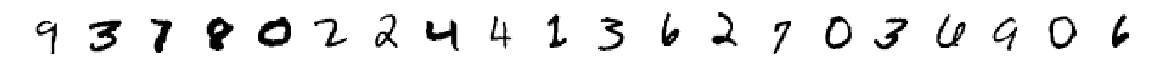

In [189]:
# plot 20 random hard images
image_plot(train_image_hard, 20)

In [190]:
# train hard image cnn classifier and output model for future use with optimal parameters

# tensorflow graph input
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder('float', [None, 10]) 

# transform 4D input images to a tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])
    
# store weight and bias for each layer

# 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
    
# 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
    
# fully connected layer, 7*7*64 inputs, 1024 outputs
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
# drop out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
# readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
start = timeit.default_timer()
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# save trained model
save_file = 'train_model_cnn_60.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,4000):
        batch = next_batch(50, train_image_hard_oneHot, train_label_hard_oneHot)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            #print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    saver.save(sess, save_file)
    print('Trained Model Saved.')
stop = timeit.default_timer()    
print('Running time: %.3f' % (stop - start))

test accuracy 0.902473
Trained Model Saved.
Running time: 858.110


### Pipeline Classification Process and Result

In [191]:
# run pipeline with training data
print('training pipeline score: %.3f' % pipeline_score(mnisttt.train.images, mnisttt.train.labels, 'train_model_cnn_60.ckpt'))

# run pipeline with testing data
print('testing pipeline score: %.3f' % pipeline_score(mnisttt.test.images, mnisttt.test.labels, 'train_model_cnn_60.ckpt'))

KeyboardInterrupt: 

## Rerun whole process with threshold = 70%

### Set threshold and compute Easy / Hard label

In [ ]:
# set default threshold to be 70%
# Easy -> 0, Hard -> 1
df_train_cw_70 = df_train_cw.apply(lambda x: 0 if np.average(x) >= 0.7 else 1, axis = 1)
df_test_cw_70 = df_test_cw.apply(lambda x: 0 if np.average(x) >= 0.7 else 1, axis = 1)
# count the number of easy and hard images
print(df_train_cw_70.value_counts())
print(df_test_cw_70.value_counts())
# get the array of easy/hard label
eh_train_label_70 = df_train_cw_70.values
eh_test_label_70 = df_test_cw_70.values

### Classify Easy / Hard Label

In [ ]:
start = timeit.default_timer()

# set the parameter grid
param_grid_rf = {'n_estimators': [50],'max_depth': [20]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, scoring = 'accuracy', cv = 3)
clf_eh_grid_rf.fit(mnisttt.train.images, eh_train_label_70)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))
print(clf_eh_grid_rf.grid_scores_)
# predict test labels and get accuracy
print(clf_eh_grid_rf.score(mnisttt.test.images, eh_test_label_70))

### Classify Easy Image

In [ ]:
# split training easy image data
train_image_easy = pd.DataFrame(mnisttt.train.images)
train_image_easy['eh'] = eh_train_label_70
train_image_easy = train_image_easy[train_image_easy['eh'] == 0]
train_image_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy image data
test_image_easy = pd.DataFrame(mnisttt.test.images)
test_image_easy['eh'] = eh_test_label_70
test_image_easy = test_image_easy[test_image_easy['eh'] == 0]
test_image_easy.drop(['eh'], axis = 1, inplace = True)

# split training easy label data
train_label_easy = pd.DataFrame(mnisttt.train.labels)
train_label_easy['eh'] = eh_train_label_70
train_label_easy = train_label_easy[train_label_easy['eh'] == 0]
train_label_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy label data
test_label_easy = pd.DataFrame(mnisttt.test.labels)
test_label_easy['eh'] = eh_test_label_70
test_label_easy = test_label_easy[test_label_easy['eh'] == 0]
test_label_easy.drop(['eh'], axis = 1, inplace = True)

In [ ]:
start = timeit.default_timer()

# fit easy data to radial svm model
clf_easy = SVC(C = 50, kernel = 'rbf', degree = 3, gamma = 'auto')
clf_easy.fit(train_image_easy, train_label_easy)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

# get the accuracy of the easy model on training dataset
print('Training accuracy: %.3f' % clf_easy.score(train_image_easy, train_label_easy))

# get the accuracy of the easy model on test dataset
print('Testing accuracy: %.3f' % clf_easy.score(test_image_easy, test_label_easy))

### Classify Hard Image

In [ ]:
# split training hard image data
train_image_hard = pd.DataFrame(mnisttt.train.images)
train_image_hard['eh'] = eh_train_label_70
train_image_hard = train_image_hard[train_image_hard['eh'] == 1]
train_image_hard.drop(['eh'], axis = 1, inplace = True)
train_image_hard.reset_index(drop = True, inplace = True)
train_image_hard = train_image_hard.as_matrix()

# split testing hard image data
test_image_hard = pd.DataFrame(mnisttt.test.images)
test_image_hard['eh'] = eh_test_label_70
test_image_hard = test_image_hard[test_image_hard['eh'] == 1]
test_image_hard.drop(['eh'], axis = 1, inplace = True)
test_image_hard.reset_index(drop = True, inplace = True)
test_image_hard = test_image_hard.as_matrix()

# split training hard label data
train_label_hard = pd.DataFrame(mnisttt.train.labels)
train_label_hard['eh'] = eh_train_label_70
train_label_hard = train_label_hard[train_label_hard['eh'] == 1]
train_label_hard.drop(['eh'], axis = 1, inplace = True)
train_label_hard.reset_index(drop = True, inplace = True)
train_label_hard = train_label_hard.as_matrix()

# split testing hard label data
test_label_hard = pd.DataFrame(mnisttt.test.labels)
test_label_hard['eh'] = eh_test_label_70
test_label_hard = test_label_hard[test_label_hard['eh'] == 1]
test_label_hard.drop(['eh'], axis = 1, inplace = True)
test_label_hard.reset_index(drop = True, inplace = True)
test_label_hard = test_label_hard.as_matrix()

# plot 20 random hard images
image_plot(train_image_hard, 20)

In [ ]:
# train hard image cnn classifier and output model for future use with optimal parameters

# tensorflow graph input
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder('float', [None, 10]) 

# transform 4D input images to a tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])
    
# store weight and bias for each layer

# 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
    
# 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
    
# fully connected layer, 7*7*64 inputs, 1024 outputs
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
# drop out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
# readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
start = timeit.default_timer()
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# save trained model
save_file = 'train_model_cnn_70.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,4000):
        batch = next_batch(50, train_image_hard_oneHot, train_label_hard_oneHot)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            #print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    saver.save(sess, save_file)
    print('Trained Model Saved.')
stop = timeit.default_timer()    
print('Running time: %.3f' % (stop - start))

### Pipeline Classification Process and Result

In [ ]:
# run pipeline with training data
print('training pipeline score: %.3f' % pipeline_score(mnisttt.train.images, mnisttt.train.labels, 'train_model_cnn_70.ckpt'))

# run pipeline with testing data
print('testing pipeline score: %.3f' % pipeline_score(mnisttt.test.images, mnisttt.test.labels, 'train_model_cnn_70.ckpt'))

## Rerun whole process with threshold = 80%

### Set threshold and compute Easy / Hard label

In [192]:
# set default threshold to be 80%
# Easy -> 0, Hard -> 1
df_train_cw_80 = df_train_cw.apply(lambda x: 0 if np.average(x) >= 0.8 else 1, axis = 1)
df_test_cw_80 = df_test_cw.apply(lambda x: 0 if np.average(x) >= 0.8 else 1, axis = 1)
# count the number of easy and hard images
print(df_train_cw_80.value_counts())
print(df_test_cw_80.value_counts())
# get the array of easy/hard label
eh_train_label_80 = df_train_cw_80.values
eh_test_label_80 = df_test_cw_80.values

KeyboardInterrupt: 

### Classify Easy / Hard Label

In [ ]:
start = timeit.default_timer()

# set the parameter grid
param_grid_rf = {'n_estimators': [50],'max_depth': [20]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, scoring = 'accuracy', cv = 3)
clf_eh_grid_rf.fit(mnisttt.train.images, eh_train_label_80)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))
print(clf_eh_grid_rf.grid_scores_)
# predict test labels and get accuracy
print(clf_eh_grid_rf.score(mnisttt.test.images, eh_test_label_80))

### Classify Easy Image

In [ ]:
# split training easy image data
train_image_easy = pd.DataFrame(mnisttt.train.images)
train_image_easy['eh'] = eh_train_label_80
train_image_easy = train_image_easy[train_image_easy['eh'] == 0]
train_image_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy image data
test_image_easy = pd.DataFrame(mnisttt.test.images)
test_image_easy['eh'] = eh_test_label_80
test_image_easy = test_image_easy[test_image_easy['eh'] == 0]
test_image_easy.drop(['eh'], axis = 1, inplace = True)

# split training easy label data
train_label_easy = pd.DataFrame(mnisttt.train.labels)
train_label_easy['eh'] = eh_train_label_80
train_label_easy = train_label_easy[train_label_easy['eh'] == 0]
train_label_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy label data
test_label_easy = pd.DataFrame(mnisttt.test.labels)
test_label_easy['eh'] = eh_test_label_80
test_label_easy = test_label_easy[test_label_easy['eh'] == 0]
test_label_easy.drop(['eh'], axis = 1, inplace = True)

In [ ]:
start = timeit.default_timer()

# fit easy data to radial svm model
clf_easy = SVC(C = 50, kernel = 'rbf', degree = 3, gamma = 'auto')
clf_easy.fit(train_image_easy, train_label_easy)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

# get the accuracy of the easy model on training dataset
print('Training accuracy: %.3f' % clf_easy.score(train_image_easy, train_label_easy))

# get the accuracy of the easy model on test dataset
print('Testing accuracy: %.3f' % clf_easy.score(test_image_easy, test_label_easy))

### Classify Hard Image

In [ ]:
# split training hard image data
train_image_hard = pd.DataFrame(mnisttt.train.images)
train_image_hard['eh'] = eh_train_label_80
train_image_hard = train_image_hard[train_image_hard['eh'] == 1]
train_image_hard.drop(['eh'], axis = 1, inplace = True)
train_image_hard.reset_index(drop = True, inplace = True)
train_image_hard = train_image_hard.as_matrix()

# split testing hard image data
test_image_hard = pd.DataFrame(mnisttt.test.images)
test_image_hard['eh'] = eh_test_label_80
test_image_hard = test_image_hard[test_image_hard['eh'] == 1]
test_image_hard.drop(['eh'], axis = 1, inplace = True)
test_image_hard.reset_index(drop = True, inplace = True)
test_image_hard = test_image_hard.as_matrix()

# split training hard label data
train_label_hard = pd.DataFrame(mnisttt.train.labels)
train_label_hard['eh'] = eh_train_label_80
train_label_hard = train_label_hard[train_label_hard['eh'] == 1]
train_label_hard.drop(['eh'], axis = 1, inplace = True)
train_label_hard.reset_index(drop = True, inplace = True)
train_label_hard = train_label_hard.as_matrix()

# split testing hard label data
test_label_hard = pd.DataFrame(mnisttt.test.labels)
test_label_hard['eh'] = eh_test_label_80
test_label_hard = test_label_hard[test_label_hard['eh'] == 1]
test_label_hard.drop(['eh'], axis = 1, inplace = True)
test_label_hard.reset_index(drop = True, inplace = True)
test_label_hard = test_label_hard.as_matrix()

# plot 20 random hard images
image_plot(train_image_hard, 20)

In [ ]:
# train hard image cnn classifier and output model for future use with optimal parameters

# tensorflow graph input
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder('float', [None, 10]) 

# transform 4D input images to a tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])
    
# store weight and bias for each layer

# 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
    
# 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
    
# fully connected layer, 7*7*64 inputs, 1024 outputs
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
# drop out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
# readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
start = timeit.default_timer()
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# save trained model
save_file = 'train_model_cnn_80.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,4000):
        batch = next_batch(50, train_image_hard_oneHot, train_label_hard_oneHot)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            #print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    saver.save(sess, save_file)
    print('Trained Model Saved.')
stop = timeit.default_timer()    
print('Running time: %.3f' % (stop - start))

### Pipeline Classification Process and Result

In [ ]:
# run pipeline with training data
print('training pipeline score: %.3f' % pipeline_score(mnisttt.train.images, mnisttt.train.labels, 'train_model_cnn_80.ckpt'))

# run pipeline with testing data
print('testing pipeline score: %.3f' % pipeline_score(mnisttt.test.images, mnisttt.test.labels, 'train_model_cnn_80.ckpt'))

## Rerun whole process with threshold = 90%

### Set threshold and compute Easy / Hard label


In [ ]:
# set default threshold to be 90%
# Easy -> 0, Hard -> 1
df_train_cw_90 = df_train_cw.apply(lambda x: 0 if np.average(x) >= 0.9 else 1, axis = 1)
df_test_cw_90 = df_test_cw.apply(lambda x: 0 if np.average(x) >= 0.9 else 1, axis = 1)
# count the number of easy and hard images
print(df_train_cw_90.value_counts())
print(df_test_cw_90.value_counts())
# get the array of easy/hard label
eh_train_label_90 = df_train_cw_90.values
eh_test_label_90 = df_test_cw_90.values

### Classify Easy / Hard Label

In [ ]:
start = timeit.default_timer()

# set the parameter grid
param_grid_rf = {'n_estimators': [50],'max_depth': [20]}
# use stratified 3-fold cross validation to tune the model
# use accuracy as scoring paramsvm
clf_eh_grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, scoring = 'accuracy', cv = 3)
clf_eh_grid_rf.fit(mnisttt.train.images, eh_train_label_90)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))
print(clf_eh_grid_rf.grid_scores_)
# predict test labels and get accuracy
print(clf_eh_grid_rf.score(mnisttt.test.images, eh_test_label_90))

### Classify Easy Image

In [ ]:
# split training easy image data
train_image_easy = pd.DataFrame(mnisttt.train.images)
train_image_easy['eh'] = eh_train_label_90
train_image_easy = train_image_easy[train_image_easy['eh'] == 0]
train_image_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy image data
test_image_easy = pd.DataFrame(mnisttt.test.images)
test_image_easy['eh'] = eh_test_label_90
test_image_easy = test_image_easy[test_image_easy['eh'] == 0]
test_image_easy.drop(['eh'], axis = 1, inplace = True)

# split training easy label data
train_label_easy = pd.DataFrame(mnisttt.train.labels)
train_label_easy['eh'] = eh_train_label_90
train_label_easy = train_label_easy[train_label_easy['eh'] == 0]
train_label_easy.drop(['eh'], axis = 1, inplace = True)

# split testing easy label data
test_label_easy = pd.DataFrame(mnisttt.test.labels)
test_label_easy['eh'] = eh_test_label_90
test_label_easy = test_label_easy[test_label_easy['eh'] == 0]
test_label_easy.drop(['eh'], axis = 1, inplace = True)

In [ ]:
start = timeit.default_timer()

# fit easy data to radial svm model
clf_easy = SVC(C = 50, kernel = 'rbf', degree = 3, gamma = 'auto')
clf_easy.fit(train_image_easy, train_label_easy)

stop = timeit.default_timer()
print('Running time: %.3f' % (stop - start))

# get the accuracy of the easy model on training dataset
print('Training accuracy: %.3f' % clf_easy.score(train_image_easy, train_label_easy))

# get the accuracy of the easy model on test dataset
print('Testing accuracy: %.3f' % clf_easy.score(test_image_easy, test_label_easy))

### Classify Hard Image

In [ ]:
# split training hard image data
train_image_hard = pd.DataFrame(mnisttt.train.images)
train_image_hard['eh'] = eh_train_label_90
train_image_hard = train_image_hard[train_image_hard['eh'] == 1]
train_image_hard.drop(['eh'], axis = 1, inplace = True)
train_image_hard.reset_index(drop = True, inplace = True)
train_image_hard = train_image_hard.as_matrix()

# split testing hard image data
test_image_hard = pd.DataFrame(mnisttt.test.images)
test_image_hard['eh'] = eh_test_label_90
test_image_hard = test_image_hard[test_image_hard['eh'] == 1]
test_image_hard.drop(['eh'], axis = 1, inplace = True)
test_image_hard.reset_index(drop = True, inplace = True)
test_image_hard = test_image_hard.as_matrix()

# split training hard label data
train_label_hard = pd.DataFrame(mnisttt.train.labels)
train_label_hard['eh'] = eh_train_label_90
train_label_hard = train_label_hard[train_label_hard['eh'] == 1]
train_label_hard.drop(['eh'], axis = 1, inplace = True)
train_label_hard.reset_index(drop = True, inplace = True)
train_label_hard = train_label_hard.as_matrix()

# split testing hard label data
test_label_hard = pd.DataFrame(mnisttt.test.labels)
test_label_hard['eh'] = eh_test_label_90
test_label_hard = test_label_hard[test_label_hard['eh'] == 1]
test_label_hard.drop(['eh'], axis = 1, inplace = True)
test_label_hard.reset_index(drop = True, inplace = True)
test_label_hard = test_label_hard.as_matrix()

# plot 20 random hard images
image_plot(train_image_hard, 20)

In [ ]:
# train hard image cnn classifier and output model for future use with optimal parameters

# tensorflow graph input
x = tf.placeholder(tf.float32, [None, 784]) 
y_ = tf.placeholder('float', [None, 10]) 

# transform 4D input images to a tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])
    
# store weight and bias for each layer

# 5x5 convolution layer 1, 1 input, 32 outputs (feature maps)
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
    
# 5x5 convolution layer 2, 32 inputs, 64 outputs (feature maps)
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
    
# fully connected layer, 7*7*64 inputs, 1024 outputs
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    
# drop out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
# readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    
start = timeit.default_timer()
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# save trained model
save_file = 'train_model_cnn_90.ckpt'
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(0,4000):
        batch = next_batch(50, train_image_hard_oneHot, train_label_hard_oneHot)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
            #print('step %d, training accuracy %g' % (i, train_accuracy))
        train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    print('test accuracy %g' % accuracy.eval(feed_dict={x: test_image_hard_oneHot, y_: test_label_hard_oneHot, keep_prob: 1.0}))
    saver.save(sess, save_file)
    print('Trained Model Saved.')
stop = timeit.default_timer()    
print('Running time: %.3f' % (stop - start))

### Pipeline Classification Process and Result

In [ ]:
# run pipeline with training data
print('training pipeline score: %.3f' % pipeline_score(mnisttt.train.images, mnisttt.train.labels, 'train_model_cnn_90.ckpt'))

# run pipeline with testing data
print('testing pipeline score: %.3f' % pipeline_score(mnisttt.test.images, mnisttt.test.labels, 'train_model_cnn_90.ckpt'))